In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.read_csv('dog_rates_tweets.csv')
data

,id,created_at,text
0,905471894702489600,2017-09-06 16:44:57,"b""*finger to earpiece* I'm hearing repawts tha..."
1,905471428790816770,2017-09-06 16:43:06,b'@maddiec0212 YAY'
2,905471297588572160,2017-09-06 16:42:34,b'@furmple oh h*ck'
3,905469246188216320,2017-09-06 16:34:25,b'@Omega_Macling ...'
4,905468331175661570,2017-09-06 16:30:47,"b""Meet Czar. He would've turned 30 this year. ..."
5,905257417457500161,2017-09-06 02:32:41,b'@LenaLovesStuff YASSS'
6,905252446221590528,2017-09-06 02:12:56,b'RT @dog_feelings: i drank. all the water. in...
7,905222050297643008,2017-09-06 00:12:09,b'Here is a doggo before and after being prese...
8,905196393643552768,2017-09-05 22:30:12,b'@DoggyRyo HOLY H*CK'
9,905180338791514113,2017-09-05 21:26:24,b'@jilly_beans08 OMFG'


In [3]:
datanew = data['text'].str.contains(r'\D0*([0-9]|1[0-9]|2[0-5])/10')
datanew

/home/alec/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7        True
8       False
9       False
10      False
11       True
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19       True
20      False
21      False
22       True
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
4237     True
4238    False
4239     True
4240     True
4241     True
4242     True
4243    False
4244    False
4245    False
4246     True
4247    False
4248     True
4249     True
4250     True
4251     True
4252     True
4253     True
4254    False
4255     True
4256     True
4257     True
4258    False
4259    False
4260     True
4261    False
4262     True
4263     True
4264     True
4265    False
4266     True
Name: text, Length: 4267, dtype: bool

In [4]:
data = data[datanew]

In [5]:
dates = pd.to_datetime(data['created_at'])
dates

7      2017-09-06 00:12:09
11     2017-09-05 21:06:47
19     2017-09-05 16:03:01
22     2017-09-05 14:44:47
33     2017-09-04 00:03:29
38     2017-09-03 15:20:19
45     2017-09-02 23:48:16
61     2017-08-31 16:07:39
66     2017-08-31 00:10:16
71     2017-08-30 16:00:05
80     2017-08-29 16:00:41
81     2017-08-29 00:08:48
83     2017-08-28 18:30:05
91     2017-08-26 21:57:12
97     2017-08-26 19:32:51
99     2017-08-26 18:04:17
103    2017-08-26 16:40:45
110    2017-08-26 00:07:57
112    2017-08-25 22:07:07
115    2017-08-25 15:00:06
117    2017-08-25 00:44:30
122    2017-08-24 15:30:06
126    2017-08-23 23:38:21
131    2017-08-23 16:15:35
139    2017-08-23 00:15:36
142    2017-08-22 19:01:33
144    2017-08-22 16:02:55
148    2017-08-22 00:01:12
158    2017-08-19 22:00:35
159    2017-08-19 21:00:04
               ...        
4221   2016-02-19 21:39:54
4222   2016-02-19 18:24:26
4226   2016-02-19 03:11:35
4227   2016-02-19 02:20:14
4228   2016-02-18 23:28:52
4230   2016-02-18 03:58:39
4

In [6]:
ratings = data['text'].str.extract(r'\D0*([0-9]|1[0-9]|2[0-5])/10')
ratings

/home/alec/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


7       13
11      12
19      12
22      13
33      12
38      13
45      13
61      13
66      13
71      14
80      12
81      14
83      13
91      12
97      13
99      13
103     12
110     12
112     13
115     13
117     13
122     12
126     14
131     13
139     12
142     13
144     12
148     13
158     12
159     13
        ..
4221     7
4222    11
4226    10
4227    12
4228     6
4230    10
4231    11
4232    10
4234     6
4236    10
4237     9
4239    11
4240    12
4241    10
4242    11
4246     5
4248    12
4249    12
4250    10
4251    11
4252    11
4253    10
4255     3
4256     8
4257    12
4260    12
4262    13
4263    13
4264    11
4266    10
Name: text, Length: 1345, dtype: object

In [7]:
data['ratings'] = ratings

/home/alec/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
data['dates'] = dates
data['ratings']

/home/alec/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


7       13
11      12
19      12
22      13
33      12
38      13
45      13
61      13
66      13
71      14
80      12
81      14
83      13
91      12
97      13
99      13
103     12
110     12
112     13
115     13
117     13
122     12
126     14
131     13
139     12
142     13
144     12
148     13
158     12
159     13
        ..
4221     7
4222    11
4226    10
4227    12
4228     6
4230    10
4231    11
4232    10
4234     6
4236    10
4237     9
4239    11
4240    12
4241    10
4242    11
4246     5
4248    12
4249    12
4250    10
4251    11
4252    11
4253    10
4255     3
4256     8
4257    12
4260    12
4262    13
4263    13
4264    11
4266    10
Name: ratings, Length: 1345, dtype: object

In [9]:
data['timestamp'] = data['dates'].apply(lambda x: x.timestamp())
data['timestamp']

/home/alec/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


7       1.504682e+09
11      1.504671e+09
19      1.504653e+09
22      1.504648e+09
33      1.504509e+09
38      1.504477e+09
45      1.504421e+09
61      1.504221e+09
66      1.504163e+09
71      1.504134e+09
80      1.504048e+09
81      1.503991e+09
83      1.503970e+09
91      1.503810e+09
97      1.503801e+09
99      1.503796e+09
103     1.503791e+09
110     1.503731e+09
112     1.503724e+09
115     1.503698e+09
117     1.503647e+09
122     1.503614e+09
126     1.503557e+09
131     1.503530e+09
139     1.503473e+09
142     1.503454e+09
144     1.503443e+09
148     1.503385e+09
158     1.503205e+09
159     1.503202e+09
            ...     
4221    1.455947e+09
4222    1.455935e+09
4226    1.455880e+09
4227    1.455877e+09
4228    1.455867e+09
4230    1.455797e+09
4231    1.455793e+09
4232    1.455791e+09
4234    1.455772e+09
4236    1.455764e+09
4237    1.455757e+09
4239    1.455710e+09
4240    1.455706e+09
4241    1.455704e+09
4242    1.455703e+09
4246    1.455683e+09
4248    1.455

In [10]:
data['ratings'] = data['ratings'].apply(lambda x: float(x))
data['ratings']

/home/alec/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


7       13.0
11      12.0
19      12.0
22      13.0
33      12.0
38      13.0
45      13.0
61      13.0
66      13.0
71      14.0
80      12.0
81      14.0
83      13.0
91      12.0
97      13.0
99      13.0
103     12.0
110     12.0
112     13.0
115     13.0
117     13.0
122     12.0
126     14.0
131     13.0
139     12.0
142     13.0
144     12.0
148     13.0
158     12.0
159     13.0
        ... 
4221     7.0
4222    11.0
4226    10.0
4227    12.0
4228     6.0
4230    10.0
4231    11.0
4232    10.0
4234     6.0
4236    10.0
4237     9.0
4239    11.0
4240    12.0
4241    10.0
4242    11.0
4246     5.0
4248    12.0
4249    12.0
4250    10.0
4251    11.0
4252    11.0
4253    10.0
4255     3.0
4256     8.0
4257    12.0
4260    12.0
4262    13.0
4263    13.0
4264    11.0
4266    10.0
Name: ratings, Length: 1345, dtype: float64

In [11]:
data

,id,created_at,text,ratings,dates,timestamp
7,905222050297643008,2017-09-06 00:12:09,b'Here is a doggo before and after being prese...,13.0,2017-09-06 00:12:09,1.504682e+09
11,905175402502660096,2017-09-05 21:06:47,b'RUPERT OMG I LOVE YOU TOO DO NOT BE DISCOURA...,12.0,2017-09-05 21:06:47,1.504671e+09
19,905098956430086144,2017-09-05 16:03:01,b'Say hello to Rush. He discovered a secret sn...,12.0,2017-09-05 16:03:01,1.504653e+09
22,905079268476145665,2017-09-05 14:44:47,b'THIS \xf0\x9f\x91\x8f IS \xf0\x9f\x91\x8f WH...,13.0,2017-09-05 14:44:47,1.504648e+09
33,904495094014861312,2017-09-04 00:03:29,"b""This is Lucy. She's trying to learn how to s...",12.0,2017-09-04 00:03:29,1.504509e+09
38,904363433650515968,2017-09-03 15:20:19,b'RT @GadGooner: 13/10 would park on this leve...,13.0,2017-09-03 15:20:19,1.504477e+09
45,904128876116410369,2017-09-02 23:48:16,"b""This is Sawyer. He discovered a way to make ...",13.0,2017-09-02 23:48:16,1.504421e+09
61,903288181222772736,2017-08-31 16:07:39,"b""This is Bentley. He's very puptective of his...",13.0,2017-08-31 16:07:39,1.504221e+09
66,903047250515025922,2017-08-31 00:10:16,b'Meet Lily. This is where she goes when the s...,13.0,2017-08-31 00:10:16,1.504163e+09
71,902923889638072321,2017-08-30 16:00:05,b'This is Misha. She waves goodbye to her owne...,14.0,2017-08-30 16:00:05,1.504134e+09


In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data['timestamp'].values, data['ratings'] )

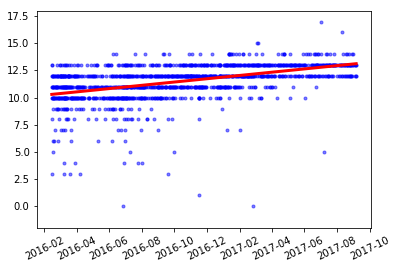

In [13]:
#plt.figure(1)
plt.plot( data['dates'].values, data['ratings'].values, 'b.', alpha=0.5)
#plt.figure(1)
plt.plot(data['dates'].values, slope * data['timestamp'].values + intercept , '-r', label='fitted line', linewidth=3)
plt.ylim(-2,18)
plt.xticks(rotation=25)
plt.show()